### APS106 Lecture Notes - Week 8, Design Problem

# Real Estate

## Problem Background

If you want to buy a house, you need to find houses that are for sale. The multiple listing service (MLS) is a real estate listings service in Toronto that is updated throughout the day with new listings. The service has limited capabilities with housing listed by district, rather than particular streets. It would be much more convenient for the user to be able to input a list of streets and see all the houses for sale on those streets. Your goal is to take the current listings and create such an app. 

## Define the Problem

We assume that you have basic MLS real estate data in a CSV file called `real_estate.csv`. 

First let's look at the file.

![](real_estate_csv.png)

You want to create an app that prompts the user for a list of streets and then, for each street, prints out the houses available on that street. 

```
Enter a street name (type exit when done): manning
Enter a street name (type exit when done): wells
Enter a street name (type exit when done): perth
Enter a street name (type exit when done): exit

Houses on manning
Address: 194 manning Size: 900 Price: $649880

Houses on wells
No houses on wells

Houses on perth
Address: 436 perth Size: 900 Price: $479900
Address: 115 perth Size: 1100 Price: $699900
Address: 516 perth Size: 800 Price: $498900
Address: 288 perth Size: 1300 Price: $699000
Address: 179 perth Size: 1100 Price: $699000
```

Some things to notice and assume:
- you need to ask for all the streets first before printing anything out
- the database is small enough that you can read it all into memory at once

## Define Test Cases 

The above is one test case. You can also think of some others.

Test case 2: Find all houses on Perth

```
Enter a street name (type exit when done): perth
Enter a street name (type exit when done): exit

Houses on perth
Address: 436 perth Size: 900 Price: $479900
Address: 115 perth Size: 1100 Price: $699900
Address: 516 perth Size: 800 Price: $498900
Address: 288 perth Size: 1300 Price: $699000
Address: 179 perth Size: 1100 Price: $699000
```

## Generate Many Creative Solutions 

There are four steps in the solution and so we can immediately come up with an initial Algorithm Plan:
* Read in the data and store it somehow
* Get the user input and store it somehow
* For each street entered, find houses on the street
* Print-out the address, size, and price of each house found

The first step and the last two steps will probably be related since the way we store the MLS data is going to determine what we have to do to find the houses on a given street and what we need to do to print out the information on each house. The fundamental question is how to represent the MLS data so that we can efficiently search for street names and then print out the data from the houses no that street. We've studied a number of data structures: lists? nested lists? tuples? sets? dictionaries?

It is not clear right now what the best options are. We could tackle this problem immediately but it seems hard. Sometimes it is better to do the steps that seem easier first to get them out of the way (and in the meantime we can let the hard problem sit in the back of our heads).

So here's my proposed Programming Plan:

1. Implement code to get the user input and store it somehow (i.e., Algorithm Plan Step 2)
1. Read the CSV file.
1.	Design data structure for the MLS data.
1.	Convert the data read from the CSV file to our data structure. Or maybe go back to Step 2 and directly put the data into our data structure while reading it.
1.	Implement the searching for houses on a street
1.	Implement the output of the data for the houses found

Steps 3 to 6 will take some more thought. Even Step 1 seems a bit challenging, but let's see what we can do.

## Programming Plan: Step 1: Implement code to get user input and store it

We are going to get a sequence of street names from the user. The obvious data structure is a list but it might make some sense to think about other ideas: tuples? sets? dictionaries?

* We probably do not want to use a dictionary because there is no key:value pattern. 
* A set has an advantage in that if the user puts the same street name in twice, we will only store it once and therefore only print out the houses on that street once. 

This decision comes down to the behaviour you want of your program. If the user makes a mistake do you want to print out the same data twice. One answer is: assume the user knows what they are doing. Another is: why would the user want to see the same data twice.

There is probably not one right answer. Let's go with a set since we have had less practice with them.

We need to keep asking the user for a street name until they type `exit`. So this suggests a loop that will exit when the user types 'exit`. We've seen such a pattern before.

In [1]:
# Get the streets from the user and store them in a set
street_set = set()

street = input("Enter a street name (type exit to end): ")
while street != "exit":
    street_set.add(street)
    street = input("Enter a street name (type exit to end): ")
        
print(street_set)

{'clinton', 'perth'}


One awkward thing about this code is that we have to write the user prompt twice. And so if we want to change it, we need to remember to do it twice. We can get around this with a variable.

In [2]:
# Get the streets from the user and store them in a set
street_set = set()

prompt = "Enter a street name (type exit to end): "

street = input(prompt)
while street != "exit":
    street_set.add(street)
    street = input(prompt)
        
print(street_set)

set()


We can now write a skeleton for the next step.

In [3]:
for street_name in street_set:
    # search for street_name in MLS data
    # if found - print out address, size, and price
    # else - print out "No houses on <street name>"

IndentationError: expected an indented block (1724252841.py, line 4)

This code is really to remind us where we need to come back to after we deal with Programming Step 2.

## Programming Plan: Step 2: Read the CSV file.

We have a number of ways to do this. The most straightforward is to use the `csvreader`.


In [ ]:
import csv

MLS_data = [] 
with open('real_estate.csv', 'r') as csvfile:
    real_estate_reader = csv.reader(csvfile)

    for row in real_estate_reader:
        MLS_data.append(row)

for house in MLS_data:
    print(house)

## Programming Plan: Step 3: Design data structure for the MLS data.

Now that we know about a variety of data structures in Python (e.g. lists, tuples, sets, dictionaries), we have the problem of figuring out which one we should use. The real answer is that you could use just about any of them but you have to face two issues:
1. How complicated is the code to write (and maintain) if I choose a particular data structure?
2. How efficient is the code in executing the tasks it needs to frequently do?

### Two Important Questions
1. What is the main task that we will want this data structure to be able to perform?
2. What is the simplest data structure?

Let's answer the second one first.

In [ ]:
# Data Structure Design #1. Using a list of MLS data.

def print_house(house):
    # display showing house address, size and price
    # Entries are: number, street, type, size, floors, bedrooms, bathrooms, 
    #              lot-size, parking, facing, age, taxes, price

    print("Address:", house[0], house[1], "Size:",
          house[3], "Price:", house[-1])

# for each street on our street_set
#    for each house on the MLS_list
#       if the house's street equals the street we are looking for
#          print the house info

MLS_street_index = 1
for street in street_set:
    for house in MLS_data[1:]:
        if house[MLS_street_index] == street:
            print_house(house)

This code doesn't do exactly what we want. Look again at the use case at the top, we want to be able to print out a "header" for each of the streets and also print out a message when there are no houses on the street. (Note that Bloor has no houses but we get no message).

So let's try again.

In [ ]:
MLS_street_index = 1
for street in street_set:
    print("Houses on", street)  
    for house in MLS_data:
        if house[MLS_street_index] == street:
            print_house(house)
        else:
            print("No houses on", street)

Unfortunately, this doesn't work either. For every house in our MLS_data, if it doesn't match the street name we are looking for, we print that out. That isn't what we wanted.

What we want to do is detect if none of the houses in our list are on a particular street and then print that message. This needs to be outside the inner loop - which iterates over each street.

Here's a standard solution to such a problem: create a "flag" that is initially `False` and which gets set to `True` when the thing you are looking for happens. Then after the loop, if the flag is still `False`, then you print out the message.

In [ ]:
MLS_street_index = 1
for street in street_set:
    print("Houses on", street)  
    found_house = False        # this is the "flag"
    for house in MLS_data:
        if house[MLS_street_index] == street:
            print_house(house)
            found_house = True
            
    if not found_house:  # if the flag hasn't been reset, then we didn't find a house
        print("No houses on", street)
            

So let's pause and think about this solution. 

What is good about it?

What is bad about it?

Brainstorm: what data structures might fix some of the problems?

In [ ]:
# Data Structure Design #2. Store the MLS data in a dict 
# key is street_name : the value will be a list of lists
# (the data for each house is a list and the entry for a street
# needs to be a list of houses on that street)

def MLS_to_dict(MLS_list):
    """ (list of lists) -> (dict of list of lists)
    creates a dict from MLS_list with key being the street name
    and the value being the list of lists of data for each house
    on the street
    """  

    house_dict = {}
    for house in MLS_list:
        if house[1] in house_dict:
            house_dict[house[1]].append(house)
        else:
            house_dict[house[1]] = [house]
            
    return house_dict

MLS_dict = MLS_to_dict(MLS_data[1:])
print(MLS_dict)

Now we need to go back to our code for finding and printing a house and see how it changes. 

In [ ]:
for street in street_set:
    if street in MLS_dict:
        print("Houses on", street)
        for house in MLS_dict[street]:
            print_house(house)
    else:
        print("No houses on", street)

This was all a pretty long detour in the middle of Programming Plan Step 3. We were essentially doing some prototyping to try and figure out what data structure would be best.

What is the conclusions?

**List**: code is simpler, algorithm is less efficient because it has to search through all the entries for a given street name.

**Dictionary**: code is more complex (e.g., converting the list to a dictionary) but it will be more efficient especially if the size of the database is large.

Which do we choose?

At this point, with such a small database, using a list is probably the best decision. However, since we want to have some practice with dictionaries, let's finish the code using one.

Let's go back to our programming plan.

1. ~~Implement code to get the user input and store it somehow (i.e., Algorithm Plan Step 2)~~
1. ~~Read the CSV file.~~
1.	~~Design data structure for the MLS data.~~
1.	Convert the data read from the CSV file to our data structure. Or maybe go back to Step 2 and directly put the data into our data structure while reading it.
1.	Implement the searching for houses on a street
1.	Implement the output of the data for the houses found

We've actually written a lot of the code we need in trying out the options for Step 3.

## Programming Plan: Step 4: Translate MLS data to our data structure.

Happily, this is almost done already since we did it in figuring out the previous step. Is there anything we want to change about this code? What don't you like?

In [ ]:
def MLS_to_dict(MLS_list):
    """ (list of lists) -> (dict of list of lists)
    creates a dict from MLS_list with key being the street name
    and the value being the list of lists of data for each house
    on the street
    """  

    house_dict = {}
    for house in MLS_list:
        if house[1] in house_dict:
            house_dict[house[1]].append(house)
        else:
            house_dict[house[1]] = [house]
            
    return house_dict

MLS_dict = MLS_to_dict(MLS_data)
print(MLS_dict)

## Programming Plan: Step 5: Implement search for houses on a street.

How do we search for houses on a street?

In [ ]:
MLS_street_index = 1
for street in street_set:
    if street in MLS_dict:
        print("Houses on", street)
        for house in MLS_dict[street]:
            print_house(house)
    else:
        print("No houses on", street)

## Programming Plan: Step 6: Implement the output of the data for the houses found.

Turns out we already did this too.

In [ ]:
def print_house(house):
    # display showing house address, size and price
    # Entries are: number, street, type, size, floors, bedrooms, bathrooms, 
    #              lot-size, parking, facing, age, taxes, price

    print("Address:", house[0], house[1], "Size:",
          house[3], "Price:", house[-1])


# Select a Solution

As is common, we had to write code to figure out how to solve the problem. That is fine and normal. What we need to be careful of is assuming that our first solution is the best. Ask some questions:
* Is this the most efficient way to solve this problem?
* What are the weaknesses of the code?
* Can the code be improved?
* Are there other data structures that should be considered? For example, what if each house was not represented by a dictionary but by a list or a tuple?

Let's put it all together.

In [ ]:
# A small application to print out the housing information for
# houses on a set of streets entered by the user.

import csv

def print_house(house):
    # display showing house address, size and price
    # Entries are: number, street, type, size, floors, bedrooms, bathrooms, 
    #              lot-size, parking, facing, age, taxes, price

    print("Address:", house[0], house[1], "Size:",
          house[3], "Price:", house[-1])

def MLS_to_dict(MLS_list):
    """ (list of lists) -> (dict of list of lists)
    creates a dict from MLS_list with key being the street name
    and the value being the list of lists of data for each house
    on the street
    """  

    house_dict = {}
    for house in MLS_list:
        if house[1] in house_dict:
            house_dict[house[1]].append(house)
        else:
            house_dict[house[1]] = [house]
            
    return house_dict


# read in the database
MLS_data = [] 
with open('real_estate.csv', 'r') as csvfile:
    real_estate_reader = csv.reader(csvfile)

    for row in real_estate_reader:
        MLS_data.append(row)

#for house in MLS_data:
#    print(house)

MLS_dict = MLS_to_dict(MLS_data[1:])
#print(MLS_dict)

# Get the streets from the user and store them in a set
street_set = set()

street = input("Enter a street name (type exit to end): ")
while street != "exit":
    street_set.add(street)
    street = input("Enter a street name (type exit to end): ")
        
#print(street_set)

for street in street_set:
    if street in MLS_dict:
        print("Houses on", street)
        for house in MLS_dict[street]:
            print_house(house)
    else:
        print("No houses on", street)

Is there anything we might want to fix-up? Any functions that we should write?

There are a number of sections of code that could usefully go into a function in order to make the code more readable.

In [7]:
# A small application to print out the housing information for
# houses on a set of streets entered by the user.

import csv

def print_house(house):
    # display showing house address, size and price
    # Entries are: number, street, type, size, floors, bedrooms, bathrooms, 
    #              lot-size, parking, facing, age, taxes, price

    print("Address:", house[0], house[1], "Size:",
          house[3], "Price:", house[-1])

def MLS_to_dict(MLS_list):
    """ (list of lists) -> (dict of list of lists)
    creates a dict from MLS_list with key being the street name
    and the value being the list of lists of data for each house
    on the street
    """  

    house_dict = {}
    for house in MLS_list:
        if house[1] in house_dict:
            house_dict[house[1]].append(house)
        else:
            house_dict[house[1]] = [house]
            
    return house_dict

def get_MLS_data(filename):
    '''
    (str)->list of lists of string
    Opens <filename> as a CSV file, reads in each row and returns the list of rows
    '''
    
    # read in the database
    MLS_data = [] 
    with open(filename, 'r') as csvfile:
        real_estate_reader = csv.reader(csvfile)

        for row in real_estate_reader:
            MLS_data.append(row)
            
    return MLS_data

def get_street_queries():
    '''
    None -> set of strings
    Prompts user to enter street names to query database
    '''
    street_set = set()

    street = input("Enter a street name (type exit to end): ")
    while street != "exit":
        street_set.add(street)
        street = input("Enter a street name (type exit to end): ")
        
    return street_set

def process_queries(streets, MLS):
    '''
    (set of str, dictionary of lists of list) -> None
    Looks up each entry in streets in MLS and prints the house info or an error message
    '''
    for street in streets:
        if street in MLS:
            print("Houses on", street)
            for house in MLS[street]:
                print_house(house)
        else:
            print("No houses on", street)

# *** Main code ***

# Read in MLS data and convert to dictionary
MLS_data = get_MLS_data("real_estate.csv")
MLS_dict = MLS_to_dict(MLS_data[1:])

# Get the streets from the user and store them in a set
street_set = get_street_queries()

# Run the queries on the MLS database
process_queries(street_set, MLS_dict)


Houses on clinton
Address: 295 clinton Size: 1300 Price: 899000
Address: 189 clinton Size: 1250 Price: 849900
Address: 277 clinton Size: 1100 Price: 949800
Address: 264 clinton Size: 1300 Price: 799900
Address: 265 clinton Size: 1100 Price: 790000


# Going beyond the design problem: visualizing the distribution of houses
What if I want to visualize the costs of the houses on the street? This is beyond the scope of the design problem so you won't be tested on it but it's a fun addition.

Houses on perth
Address: 436 perth Size: 900 Price: 479900
Address: 115 perth Size: 1100 Price: 699900
Address: 516 perth Size: 800 Price: 498900
Address: 288 perth Size: 1300 Price: 699000
Address: 179 perth Size: 1100 Price: 699000


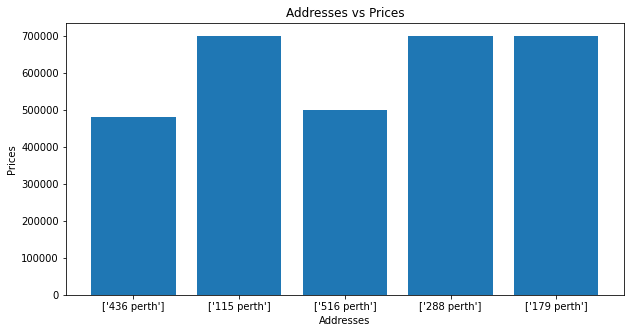

In [44]:
import matplotlib.pyplot as plt

# A small application to print out the housing information for
# houses on a set of streets entered by the user.

import csv

def print_house(house):
    # display showing house address, size and price
    # Entries are: number, street, type, size, floors, bedrooms, bathrooms,
    #              lot-size, parking, facing, age, taxes, price

    print("Address:", house[0], house[1], "Size:",
          house[3], "Price:", house[-1])

def MLS_to_dict(MLS_list):
    """ (list of lists) -> (dict of list of lists)
    creates a dict from MLS_list with key being the street name
    and the value being the list of lists of data for each house
    on the street
    """

    house_dict = {}
    for house in MLS_list:
        if house[1] in house_dict:
            house_dict[house[1]].append(house)
        else:
            house_dict[house[1]] = [house]

    return house_dict

def get_MLS_data(filename):
    '''
    (str)->list of lists of string
    Opens <filename> as a CSV file, reads in each row and returns the list of rows
    '''

    # read in the database
    MLS_data = []
    with open(filename, 'r') as csvfile:
        real_estate_reader = csv.reader(csvfile)

        for row in real_estate_reader:
            MLS_data.append(row)

    return MLS_data

def get_street_queries():
    '''
    None -> set of strings
    Prompts user to enter street names to query database
    '''
    street_set = set()

    street = input("Enter a street name (type exit to end): ")
    while street != "exit":
        street_set.add(street)
        street = input("Enter a street name (type exit to end): ")

    return street_set

def process_queries(streets, MLS):
    '''
    (set of str, dictionary of lists of list) -> None
    Looks up each entry in streets in MLS and prints the house info or an error message
    '''
    for street in streets:
        if street in MLS:
            print("Houses on", street)
            for house in MLS[street]:
                print_house(house)
            price_visualizer(street, MLS)
        else:
            print("No houses on", street)

def price_visualizer (strt, listing):
    prices = []
    address = []
    for strt in listing[strt]:
        #print (str)
        address.append([strt[0] + ' ' + strt[1]])
        prices.append(float(strt[-1]))
    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.xticks(range(len(address)), address)
    plt.xlabel('Addresses')
    plt.ylabel('Prices')
    plt.title('Addresses vs Prices')
    plt.bar(range(len(prices)), prices)
    plt.show()

# *** Main code ***

# Read in MLS data and convert to dictionary
MLS_data = get_MLS_data("real_estate.csv")
MLS_dict = MLS_to_dict(MLS_data[1:])

# Get the streets from the user and store them in a set
street_set = get_street_queries()

# Run the queries on the MLS database
process_queries(street_set, MLS_dict)